In [1]:
from gensim.models.word2vec import Word2Vec

In [2]:
from konlpy.tag import Okt

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
trainData = pd.read_table("ratings.txt")

In [5]:
len(trainData)

200000

In [6]:
trainData.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [7]:
trainData[trainData.isnull().any(axis=1)]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [10]:
trainData = trainData.dropna(how='any') # null값 행 전체 제거

In [11]:
trainData.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [12]:
len(trainData)

199992

In [17]:
# 자료구조가 series라서 이걸 str로 변경 후 치환
trainData['document'] = trainData['document'].str.replace("[^ ㄱ-ㅎㅏ-ㅣ가-힣]","") # 한글을 제외한 모든 문자 제거

C:\Users\joww0\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
trainData

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰레기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [19]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [20]:
okt = Okt() #okt를 이용한 형태소 분석작업(토큰화)

In [21]:
tokenizedData = []
for sentence in trainData['document']:
    tempX = okt.morphs(sentence, stem=True)
    tempX = [word for word in tempX if word not in stopwords]
    tokenizedData.append(tempX)

In [23]:
tokenizedData

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '그렇다',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화'],
 ['사랑', '을', '해보다', '사람', '라면', '처음', '부터', '끝', '까지', '웃다', '있다', '영화'],
 ['완전', '감동', '이다', '다시', '보다', '감동'],
 ['개', '전쟁', '나오다', '나오다', '빠', '로', '보고', '싶다'],
 ['굿'],
 ['바보', '아니다', '병', '쉰', '이다'],
 ['내',
  '나이',
  '같다',
  '영화',
  '지금',
  '보다',
  '나',
  '감동',
  '적',
  '이다',
  '하지만',
  '훗날',
  '다시',
  '보다',
  '사하나',
  '하',
  '나',
  '그',
  '감정',
  '을',
  '완벽하다',
  '이해',

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


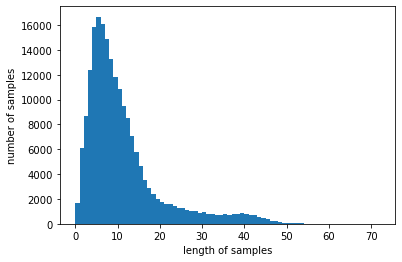

In [43]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenizedData))
print('리뷰의 평균 길이 :',sum(map(len, tokenizedData))/len(tokenizedData))
plt.hist([len(s) for s in tokenizedData], bins=72)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
model = Word2Vec(sentences=tokenizedData, size = 100, window = 5, min_count=5)

In [33]:
model.wv.most_similar("한석규")

[('황정민', 0.910915195941925),
 ('설경구', 0.9086607694625854),
 ('엄정화', 0.9071152210235596),
 ('안성기', 0.9029721021652222),
 ('차승원', 0.9003632068634033),
 ('송강호', 0.8997721672058105),
 ('김혜수', 0.8988145589828491),
 ('전도연', 0.8930539488792419),
 ('김하늘', 0.8763552904129028),
 ('최민수', 0.8757233619689941)]

In [34]:
model.wv.most_similar("송강호")

[('김혜수', 0.901267409324646),
 ('차승원', 0.9009699821472168),
 ('한석규', 0.8997722268104553),
 ('류승범', 0.8904622793197632),
 ('황정민', 0.8897582292556763),
 ('설경구', 0.8895062208175659),
 ('디카프리오', 0.886433482170105),
 ('엄정화', 0.877632737159729),
 ('전도연', 0.8725669384002686),
 ('하정우', 0.8685946464538574)]

In [35]:
model.wv.most_similar("공포")

[('스릴러', 0.8335850238800049),
 ('장르', 0.7239053249359131),
 ('공포영화', 0.7086309790611267),
 ('코미디', 0.6988117098808289),
 ('서스펜스', 0.6966685056686401),
 ('판타지', 0.6773796081542969),
 ('멜로', 0.6617348194122314),
 ('미스터리', 0.6592156291007996),
 ('호러', 0.6541531085968018),
 ('공포물', 0.649729311466217)]

In [52]:
model.wv.most_similar(positive=['송강호','변호인'],negative=['한석규'])

[('사형제', 0.7663891315460205),
 ('예비군', 0.7637308835983276),
 ('중화권', 0.7527655363082886),
 ('동남아', 0.7510418891906738),
 ('고려', 0.7491487264633179),
 ('오크', 0.748465895652771),
 ('증언', 0.7433171272277832),
 ('면모', 0.7423156499862671),
 ('간통', 0.7419456243515015),
 ('유다', 0.740202784538269)]